In [3]:
!pip install surprise

     |████████████████████████████████| 11.8MB 15.9MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617625 sha256=7ab4d119079b061c458230e3318d7cbf8b7cfa2a3ba9e627806dfa8994a025b1
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [35]:
!pip install pycountry

     |████████████████████████████████| 10.1MB 24.7MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=c4d244ef75803b70c871c6cfc5250102f4ef184fdf25273e7128ac318a155e3c
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_colwidth',None)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd '/content/drive/MyDrive/archive'

/content/drive/MyDrive/archive


In [36]:
users = pd.read_csv('Users.csv',low_memory=False)
ratings = pd.read_csv('Ratings.csv',low_memory=False)
books = pd.read_csv('Books.csv',low_memory=False)

In [37]:
print(books.shape)
books.columns=['ISBN','Title','Author','Year_Of_Publication','Publisher','Image_URL_S','Image_URL_M','Image_URL_L']
books.drop(['Image_URL_S','Image_URL_L'],axis=1,inplace=True)
books.head()

(271360, 8)


,ISBN,Title,Author,Year_Of_Publication,Publisher,Image_URL_M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg


Check NULL values

In [38]:
L=((books.isnull().sum()).sort_values()).to_dict()
for i in L:
    print(i,"--->",L[i])  

ISBN ---> 0
Title ---> 0
Year_Of_Publication ---> 0
Image_URL_M ---> 0
Author ---> 1
Publisher ---> 2


In [39]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Title                271360 non-null  object
 2   Author               271359 non-null  object
 3   Year_Of_Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image_URL_M          271360 non-null  object
dtypes: object(6)
memory usage: 12.4+ MB


In [40]:
duplicateRowsDF = books[books.duplicated()]
duplicateRowsDF.shape

(0, 6)

In [41]:
print("unique isbn: ",len(books["ISBN"].unique()))
print("total rows: ",books.shape[0])
print("unique title: ",len(books["Title"].unique()))
print("total rows: ",books.shape[0])

unique isbn:  271360
total rows:  271360
unique title:  242135
total rows:  271360


In [42]:
books['Author'].fillna("Unknown",inplace=True)
books['Publisher'].fillna("Unknown",inplace=True)
books.isnull().sum()

ISBN                   0
Title                  0
Author                 0
Year_Of_Publication    0
Publisher              0
Image_URL_M            0
dtype: int64

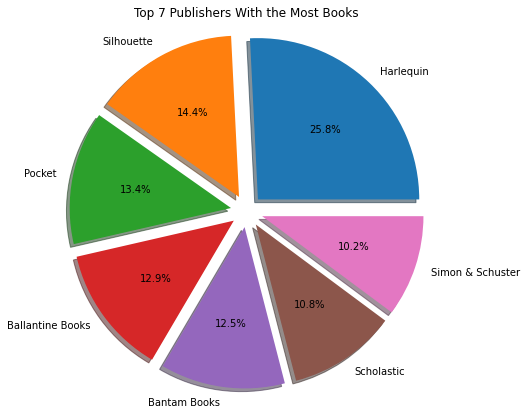

In [43]:
my_dict=(books['Publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon & Schuster'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Publishers With the Most Books")
ax1.axis ('equal')
plt.show()

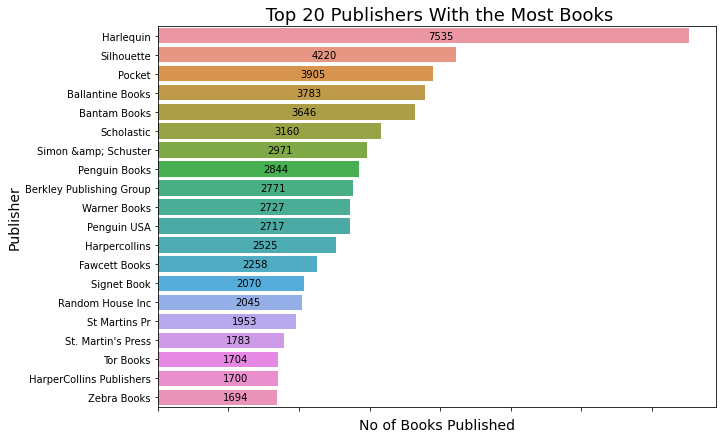

In [44]:
b = count.sort_values(by=['count'], ascending = False)
b = b.head(20)
x =['Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon &amp; Schuster']
y = [7537,4220,3905,3783,3646,3160,2971]
fig=plt.figure(figsize=(10,7))
ax = sns.barplot(x = 'count',y = 'c' , data = b)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
plt.xlabel("No of Books Published", size=14)
plt.ylabel("Publisher", size=14)
plt.title(" Top 20 Publishers With the Most Books", size=18)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width()/2, p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show()

In [45]:
np.set_printoptions(threshold=np.inf)
books['Year_Of_Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [46]:
index=books.loc[books['Year_Of_Publication']=='DK Publishing Inc'].index
books.drop(index,inplace=True)
index=books.loc[books['Year_Of_Publication']=='Gallimard'].index
books.drop(index,inplace=True)
books['Year_Of_Publication'].replace({'0':books['Year_Of_Publication'].value_counts().idxmax()},inplace=True)
books['Year_Of_Publication'] = books['Year_Of_Publication'].astype(str).astype(int)
books['Year_Of_Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030, 1911,
       1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934, 1910,
       1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901, 2010,
       1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378, 1919,
       1922, 1897, 2024, 1376, 2037])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


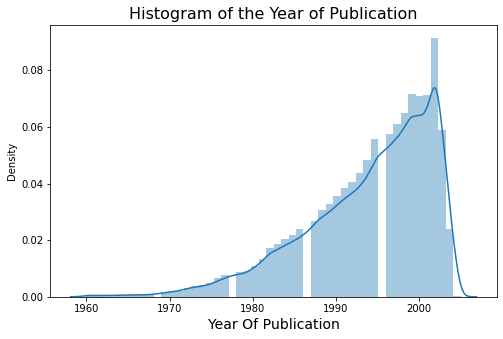

In [47]:
fig=plt.figure(figsize=(8,5))
y1 = books[books['Year_Of_Publication'] >= 1960]
y1 = y1[y1['Year_Of_Publication'] <= 2005]
sns.distplot(y1['Year_Of_Publication'])
plt.xlabel('Year Of Publication',size=14)
plt.title('Histogram of the Year of Publication',size=16)
plt.show()

In [48]:
print(users.shape)
users.columns=['UserID','Location','Age']
users.head()

(278858, 3)


,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [49]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   UserID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [50]:
L=((users.isnull().sum()).sort_values()).to_dict()
for i in L:
    print(i,"--->",L[i])  

UserID ---> 0
Location ---> 0
Age ---> 110762


In [51]:
users['Age'].fillna(users['Age'].value_counts().idxmax(),inplace=True)
for i in users['Age'][users['Age']>95]:
        users['Age'].replace({i:users['Age'].value_counts().idxmax()},inplace=True)
for i in users['Age'][users['Age']==0]:
        users['Age'].replace({i:users['Age'].value_counts().idxmax()},inplace=True)
users['Age'] = users['Age'].astype(int) 
users['Age'].unique()

array([24, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 20, 34, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67,  1, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75,  3,
       76, 83, 68, 11, 77,  2, 70, 93,  8,  7,  4, 81, 10,  5,  6, 84, 82,
       90, 91, 94, 85, 86, 92, 87, 95, 89, 88])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


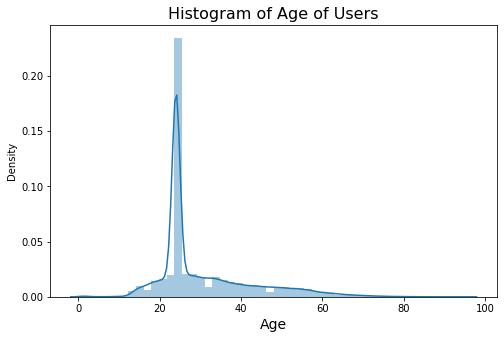

In [52]:
fig=plt.figure(figsize=(8,5))
sns.distplot(users['Age'])
plt.xlabel('Age',size=14)
plt.title('Histogram of Age of Users',size=16)
plt.show()

In [53]:
users['Location']

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: Location, Length: 278858, dtype: object

In [54]:
users[['city','state','country','nan','nan','nan','nan','nan','nan']]=users['Location'].apply(lambda x: pd.Series(str(x).split(",")))
users.drop(['Location','nan'],axis=1,inplace=True)
users

,UserID,Age,city,state,country
0,1,24,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,24,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,24,farnborough,hants,united kingdom
...,...,...,...,...,...
278853,278854,24,portland,oregon,usa
278854,278855,50,tacoma,washington,united kingdom
278855,278856,24,brampton,ontario,canada
278856,278857,24,knoxville,tennessee,usa


In [55]:
print(ratings.shape)
ratings.columns=['UserID','ISBN','Rating']
ratings.head()

(1149780, 3)


,UserID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [56]:
ratings['Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [57]:
filter1 = ratings[ratings["UserID"].isin(users["UserID"])] 
df_ratings=filter1[filter1["ISBN"].isin(books["ISBN"])] 
df=pd.merge(users,df_ratings,on='UserID')
df

,UserID,Age,city,state,country,ISBN,Rating
0,2,18,stockton,california,usa,0195153448,0
1,8,24,timmins,ontario,canada,0002005018,5
2,8,24,timmins,ontario,canada,0060973129,0
3,8,24,timmins,ontario,canada,0374157065,0
4,8,24,timmins,ontario,canada,0393045218,0
...,...,...,...,...,...,...,...
1031127,278854,24,portland,oregon,usa,0425163393,7
1031128,278854,24,portland,oregon,usa,0515087122,0
1031129,278854,24,portland,oregon,usa,0553275739,6
1031130,278854,24,portland,oregon,usa,0553578596,0


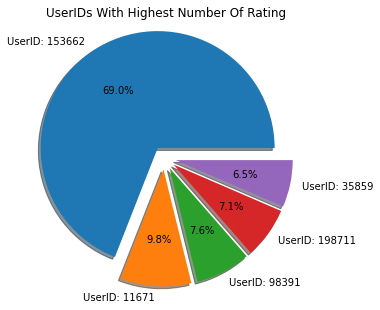

In [58]:
# Pie chart showing countries with most number of users 
my_dict=(df_ratings['Rating'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'UserID: 153662','UserID: 11671','UserID: 98391','UserID: 198711','UserID: 35859'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1)

fig1 , ax1 = plt.subplots(figsize=(5,5))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("UserIDs With Highest Number Of Rating")
ax1.axis ('equal')

plt.show()

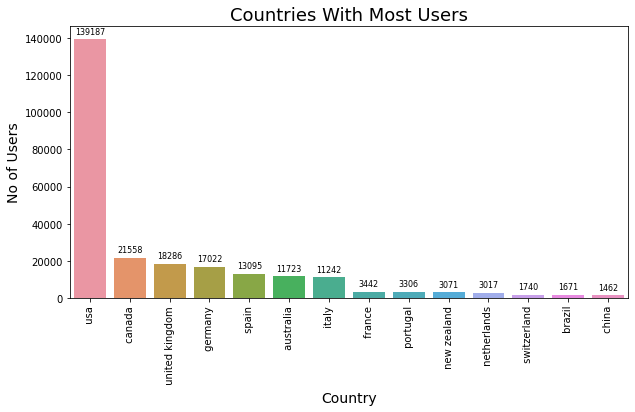

In [59]:
my_dict=(users['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
f.drop(7,inplace=True)
fig=plt.figure(figsize=(10,5))
ax = sns.barplot(y = 'count',x= 'c' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 
plt.xlabel("Country", size=14)
plt.ylabel("No of Users", size=14)
plt.title("Countries With Most Users", size=18)
plt.show()

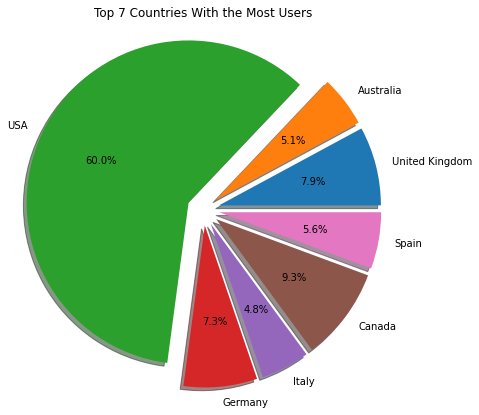

In [60]:
# Pie chart showing countries with most number of users 
my_dict=(users['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'United Kingdom','Australia','USA','Germany','Italy','Canada','Spain'
sizes = [count['count'].iloc[2],count['count'].iloc[5],count['count'].iloc[0],count['count'].iloc[3],count['count'].iloc[6],
         count['count'].iloc[1],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )

fig1 , ax1 = plt.subplots(figsize=(7,7))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Countries With the Most Users")
ax1.axis ('equal')

plt.show()

In [61]:
coun=[]
for country in df["country"].unique():
    coun.append(country)
import pycountry
def do_fuzzy_search(country):
    result = pycountry.countries.search_fuzzy(country)
    return result[0].alpha_3
iso_map=[]
c=[]
for i in coun:
    try:
        iso_map.append(do_fuzzy_search(i))
        c.append(i)
    except:
        iso_map.append('unknown')
        c.append(i)
        continue
df1=pd.DataFrame(iso_map,c,columns=['code'])
df1

,code
usa,USA
canada,CAN
spain,ESP
,GBR
germany,DEU
...,...
andalucia,ESP
mozambique,MOZ
angola,AGO
"italy""",unknown


In [62]:
l=list(df1.index)
country_code=[]
for i in df['country']:
    if i in l:
        country_code.append(df1['code'].loc[df1.index==i][0])
df['Country_Code'] = np.array(country_code)

In [63]:
import pycountry
grouped = df.groupby(['Country_Code','country'])
avg=pd.DataFrame(grouped['Rating'].agg(np.mean))
avg.reset_index(inplace=True)
avg.columns=['Country Code','Country','Average Rating']
import plotly.express as px
fig = px.choropleth(avg, locations=avg['Country Code'],color=avg['Average Rating'],hover_name=avg['Country'],
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [64]:
import pycountry
grouped = df.groupby(['Country_Code','country'])
avg=pd.DataFrame(grouped['Age'].agg(np.mean))
avg.reset_index(inplace=True)
avg.columns=['Country Code','Country','Average Age']
import plotly.express as px
fig = px.choropleth(avg, locations=avg['Country Code'],color=avg['Average Age'],hover_name=avg['Country'],
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

<h2>Popularity Based Recommendation</h2>

In [65]:
a=df[df['Rating']>0]
grouped = a.groupby('ISBN')
popular_books = pd.DataFrame(grouped['Rating'].agg([np.size, np.mean]))
most_popular = popular_books.sort_values(['mean'], ascending=False)
pop=most_popular[most_popular['size']>200]
pop_title=list(pop[:10].index)
titles=[]
for i in pop_title:
    titles.append(books['Title'].loc[books['ISBN']==i].values[0])
index=1
for i in titles:
    print(index,'. ',i)
    index+=1

1 .  Harry Potter and the Order of the Phoenix (Book 5)
2 .  To Kill a Mockingbird
3 .  Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
4 .  The Secret Life of Bees
5 .  The Da Vinci Code
6 .  The Lovely Bones: A Novel
7 .  The Red Tent (Bestselling Backlist)
8 .  The Poisonwood Bible: A Novel
9 .  Where the Heart Is (Oprah's Book Club (Paperback))
10 .  Angels &amp; Demons


<h2>Collabrative Filtering Based Recommendation</h2>

In [67]:
df=df[df['Rating']>0]

In [68]:
counts1 = df['UserID'].value_counts()
df= df[df['UserID'].isin(counts1[counts1 > 200].index)]
df

,UserID,Age,city,state,country,ISBN,Rating,Country_Code
10196,4385,33,albq,new mexico,usa,0061083402,10,USA
10198,4385,33,albq,new mexico,usa,0061093343,9,USA
10199,4385,33,albq,new mexico,usa,0061096156,10,USA
10201,4385,33,albq,new mexico,usa,0312956762,10,USA
10202,4385,33,albq,new mexico,usa,0312980353,10,USA
...,...,...,...,...,...,...,...,...
1014234,274061,26,gahanna/columbus,ohio,usa,1892213737,10,USA
1014235,274061,26,gahanna/columbus,ohio,usa,189221394X,10,USA
1014236,274061,26,gahanna/columbus,ohio,usa,1892213958,10,USA
1014237,274061,26,gahanna/columbus,ohio,usa,1892213966,10,USA


In [69]:
len(df['ISBN'].unique())

44306

In [70]:
cdf1=df[['UserID','ISBN','Rating']]
cdf=pd.merge(cdf1,books,on='ISBN')
cdf

,UserID,ISBN,Rating,Title,Author,Year_Of_Publication,Publisher,Image_URL_M
0,4385,0061083402,10,The Bandit's Lady (Harper Monogram),Maureen Child,1995,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0061083402.01.MZZZZZZZ.jpg
1,4385,0061093343,9,Fault Lines,Anne Rivers Siddons,1996,HarperTorch,http://images.amazon.com/images/P/0061093343.01.MZZZZZZZ.jpg
2,11676,0061093343,8,Fault Lines,Anne Rivers Siddons,1996,HarperTorch,http://images.amazon.com/images/P/0061093343.01.MZZZZZZZ.jpg
3,4385,0061096156,10,Society of the Mind: A Cyberthriller,Eric L. Harry,1997,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0061096156.01.MZZZZZZZ.jpg
4,4385,0312956762,10,Die Hard: With a Vengeance - A Novel,D. Chiel,1995,St Martins Pr,http://images.amazon.com/images/P/0312956762.01.MZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
58169,274061,1892213737,10,"Cardcaptor Sakura, Number 5",Clamp,2001,Tokyopop,http://images.amazon.com/images/P/1892213737.01.MZZZZZZZ.jpg
58170,274061,189221394X,10,Clover #2,Clamp,2001,Tokyopop,http://images.amazon.com/images/P/189221394X.01.MZZZZZZZ.jpg
58171,274061,1892213958,10,Clover #3,Clamp,2002,Tokyopop,http://images.amazon.com/images/P/1892213958.01.MZZZZZZZ.jpg
58172,274061,1892213966,10,"Clover (Clover, 4)",Clamp,2002,TokyoPop,http://images.amazon.com/images/P/1892213966.01.MZZZZZZZ.jpg


In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cdf['User_ID']=le.fit_transform(cdf['UserID'])
cdf['title_id']=le.fit_transform(cdf['Title'])
cdf.drop('UserID',axis=1,inplace=True)
cdf

,ISBN,Rating,Title,Author,Year_Of_Publication,Publisher,Image_URL_M,User_ID,title_id
0,0061083402,10,The Bandit's Lady (Harper Monogram),Maureen Child,1995,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0061083402.01.MZZZZZZZ.jpg,0,29551
1,0061093343,9,Fault Lines,Anne Rivers Siddons,1996,HarperTorch,http://images.amazon.com/images/P/0061093343.01.MZZZZZZZ.jpg,0,11125
2,0061093343,8,Fault Lines,Anne Rivers Siddons,1996,HarperTorch,http://images.amazon.com/images/P/0061093343.01.MZZZZZZZ.jpg,4,11125
3,0061096156,10,Society of the Mind: A Cyberthriller,Eric L. Harry,1997,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0061096156.01.MZZZZZZZ.jpg,0,27212
4,0312956762,10,Die Hard: With a Vengeance - A Novel,D. Chiel,1995,St Martins Pr,http://images.amazon.com/images/P/0312956762.01.MZZZZZZZ.jpg,0,8828
...,...,...,...,...,...,...,...,...,...
58169,1892213737,10,"Cardcaptor Sakura, Number 5",Clamp,2001,Tokyopop,http://images.amazon.com/images/P/1892213737.01.MZZZZZZZ.jpg,117,5731
58170,189221394X,10,Clover #2,Clamp,2001,Tokyopop,http://images.amazon.com/images/P/189221394X.01.MZZZZZZZ.jpg,117,6625
58171,1892213958,10,Clover #3,Clamp,2002,Tokyopop,http://images.amazon.com/images/P/1892213958.01.MZZZZZZZ.jpg,117,6626
58172,1892213966,10,"Clover (Clover, 4)",Clamp,2002,TokyoPop,http://images.amazon.com/images/P/1892213966.01.MZZZZZZZ.jpg,117,6628


In [72]:
from surprise import Reader
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(cdf[['User_ID','title_id','Rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4612  1.4902  1.4954  1.4931  1.4746  1.4829  0.0131  
MAE (testset)     1.0647  1.0791  1.0879  1.0896  1.0863  1.0815  0.0091  
Fit time          3.19    3.18    3.13    3.19    3.16    3.17    0.02    
Test time         0.08    0.08    0.08    0.12    0.08    0.09    0.02    


{'fit_time': (3.189040422439575,
  3.1811001300811768,
  3.1307921409606934,
  3.1898090839385986,
  3.157587766647339),
 'test_mae': array([1.06471329, 1.07913932, 1.08792585, 1.0895604 , 1.08626385]),
 'test_rmse': array([1.46122674, 1.49017441, 1.49537904, 1.49312918, 1.47455341]),
 'test_time': (0.08108115196228027,
  0.07860183715820312,
  0.08008122444152832,
  0.12024474143981934,
  0.07907414436340332)}

In [73]:
def user_rec(id):
    user= cdf[['ISBN','Title','Author','Year_Of_Publication','Publisher','title_id']].copy()
    user = user.reset_index()
# getting full dataset
    data = Dataset.load_from_df(cdf[['User_ID','title_id','Rating']], reader)
    trainset = data.build_full_trainset()
    svd.fit(trainset)
    user['Estimate_Score'] = user['title_id'].apply(lambda x: svd.predict(id, x).est)
    user = user.drop(['index','title_id'], axis = 1)
    user= user.sort_values('Estimate_Score' , ascending = False)
    counts1 = user['Estimate_Score'].value_counts()
    user = user[user['Estimate_Score'].isin(counts1[counts1 == 1].index)]
    return user.head(10)

In [74]:
pd.set_option('display.max_rows',None) 
Uid=3
print("THE ID OF THE USER: ",Uid)
details=cdf.loc[cdf['User_ID']==Uid]
id=details['User_ID'].iloc[0]
a=user_rec(id)
a.reset_index(inplace=True)
a.drop(['index'],axis=1,inplace=True)
details.reset_index(inplace=True)
details
details.drop(['index','User_ID','title_id','ISBN'],axis=1,inplace=True)
print("\n********************************************USER HAS RATED THESE BOOKs******************************************************")
title_1=list(details['Title'])
rat1=list(details['Rating'])
for i,j in zip(title_1,rat1):
    print(i,'=>',j)
print("\n****************HERE ARE A FEW RECOMMENDATIONS FOR THE USER WITH THE  MOST ESTIMATED POINTS THE USER WILL GIVE******************")

display(a)

THE ID OF THE USER:  3

********************************************USER HAS RATED THESE BOOKs******************************************************
The Runaway Jury => 9
Seven Up (A Stephanie Plum Novel) => 8
MANY WATERS => 7
Dying for Chocolate (Culinary Mysteries (Paperback)) => 8
Wicked: The Life and Times of the Wicked Witch of the West => 7
Cold Comfort Farm => 6
Girl in Hyacinth Blue => 8
To the Nines: A Stephanie Plum Novel => 6
Four To Score (A Stephanie Plum Novel) => 8
Coraline => 9
The Sweet Potato Queens' Book of Love => 7
Two for the Dough => 8
THREE TO GET DEADLY : A Stephanie Plum Novel => 8
The Other Boleyn Girl => 9
The Joy Luck Club => 9
The Kitchen God's Wife => 8
Joshua => 8
Mere Christianity: A revised and enlarged edition, with a new introduction, of the three books, The case for Christianity, Christian behaviour, and Beyond personality => 10
Once upon a More Enlightened Time: More Politically Correct Bedtime Stories => 8
The Boy Next Door => 8
Today I Am a Ma'Am

,ISBN,Title,Author,Year_Of_Publication,Publisher,Estimate_Score
0,0812516621,The Hungry Moon,Ramsey Campbell,1987,Tor Books (Mm),8.943151
1,0441873375,The Warlock in Spite of Himself,Christopher Stasheff,1994,Ace Books,8.912877
2,0689831404,The Wind in the Willows (Aladdin Classics),Kenneth Grahame,1999,Aladdin,8.828779
3,0671223666,HOW DID I GET TO BE 40 &amp; OTHER ATROCITIES,Judith Viorst,1976,Simon &amp; Schuster,8.725618
4,0671571435,Song of the West (Silhouette Romance #143),Nora Roberts,1982,Pocket Books (Mm),8.695019
5,0679410139,Brando: Songs My Mother Taught Me,MARLON BRANDO,1994,Modern Library,8.675949
6,0449244288,Not a Penny More 4,Jeffrey Archer,1981,Fawcett Books,8.647461
7,0590926675,"So Far From Home : The Diary of Mary Driscoll, an Irish Mill Girl, Lowell, Massachusetts, 1847 (Dear America)",Barry Denenberg,1997,Scholastic,8.646915
8,3596215080,Der Konig David Bericht,Stefan Heym,1994,Fischer Taschenbuch Verlag GmbH,8.635507
9,0140178406,Aunt Dimity's Death (Aunt Dimity (Paperback)),Nancy Atherton,1993,Penguin Books,8.631925
